In [1]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
N = 100 #number of nodes
M = 10 # number of communities 



In [3]:
G = nx.random_partition_graph([int(N/M)]*M,0.95,0.01)


    

In [4]:
node2group = np.empty([N])
partlist = list(G.graph['partition']);
for p in range(M):
    for node in partlist[p]:
        node2group[node] = int(p)
node2group = np.asarray(node2group, dtype = int)

In [5]:
C = nx.Graph()
nodeset = set(range(N))
while len(nodeset) > 0:
    n  = np.random.choice(list(nodeset), 1, replace = False)[0]
    c = node2group[n]
    for neigh in G.neighbors(n):
        c_n = node2group[neigh]
        if c_n != c:
            C.add_edge(c, c_n)
    nodeset = nodeset - {n}

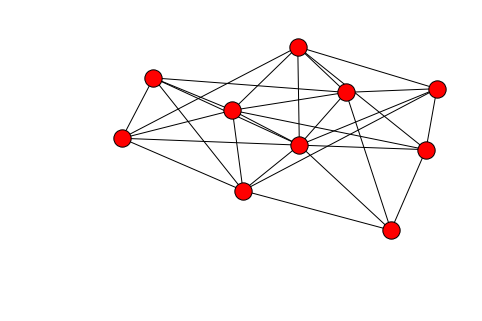

In [6]:
nx.draw(C)

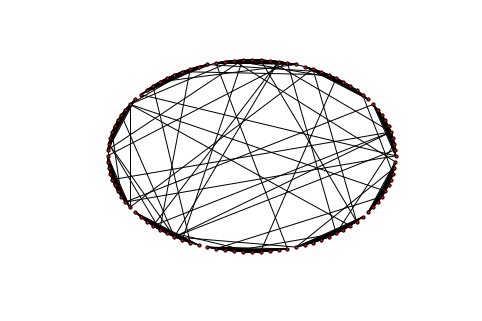

In [7]:
position = nx.shell_layout(G)
nx.draw(G, pos = position, node_size=10)


In [8]:
edgeswap = N
H = G.copy()
#H = nx.random_partition_graph([int(N/M)]*M,0.95,0.01)
#nx.double_edge_swap(H,nswap=edgeswap, max_tries=edgeswap*10)
#nx.draw(H, pos = position, node_size = 10)

In [9]:
trialtime = 500
#infection = 0.5

steps = 20
infection  = 0.12


infectionsize = np.zeros([steps, trialtime])
neighboursize = np.zeros([steps, trialtime])
infected_neighbours = np.zeros([steps, trialtime])
infection_c_size = np.zeros([steps, trialtime])

'''
control_infectionsize = np.zeros([steps, trialtime])
control_neighboursize = np.zeros([steps, trialtime])
control_infected_neighbours = np.zeros([steps, trialtime])
'''
for s in range(1,steps):
    #infection = s/(steps-1)*0.05
    infection_thresh = s/(steps-1)
    print(infection_thresh)
    infected_nodes = set(np.random.choice(range(N), int(N*infection), replace=False))
    clean_nodes = set(range(N)) - infected_nodes
    infected_coalitions = set()
   
    for t in range(trialtime):
        
        infectionsize[s][t] = len(infected_nodes)/N     
        infection_c_size[s][t] = len(infected_coalitions)/M
        if t > 10 and infectionsize[s][t]  <= 1/N:
            infectionsize[s][range(t+1, trialtime)] = 0
            infection_c_size[s][range(t+1, trialtime)] = 0
            neighboursize[s][range(t+1, trialtime)] = neighboursize[s][t]
            infected_neighbours[s][range(t+1, trialtime)] = infected_neighbours[s][t]
            break
        if t > 10 and infectionsize[s][t] >= 1- 1/N:
            infectionsize[s][range(t+1, trialtime)] = 1
            neighboursize[s][range(t+1, trialtime)] = neighboursize[s][t]
            infected_neighbours[s][range(t+1, trialtime)] = infected_neighbours[s][t]
            infection_c_size[s][range(t+1, trialtime)] = 1
            break
        if len(infected_coalitions) == M:
            break
        
        
        if len(infected_coalitions) ==0:
            coalition = np.random.choice(range(M), 1, replace=False)[0]
        else:
            e = 0
            while e == 0:
                nodec = np.random.choice(list(infected_coalitions), 1, replace=False)[0]
                neighset = {c for c in C.neighbors(nodec)}
                e = len(neighset - infected_coalitions)
                if e > 0:
                    coalition = np.random.choice(list(neighset) ,1, replace=False)[0]

        
       
        
        #node = np.random.choice(range(N), 1, replace=False)[0]
        #coalition = partlist[node2group[node]]
        
        
        neighbors = set()
        coal =  G.graph['partition'][coalition];
        for member in coal:
            neighbors.update({n for n in H.neighbors(member)})
        
        neighbors =  neighbors - coal
        neighboursize[s][t] = len(neighbors)
        infected_neighbours[s][t] = len(infected_nodes.intersection(neighbors))
        
        if len(infected_nodes.intersection(neighbors)) >= infection_thresh*len(neighbors) :

            infected_nodes.update(coal)
            infected_coalitions.update({coalition})
            clean_nodes = set(range(N))- infected_nodes

                        
        else :
            clean_nodes.update(coal)
            infected_nodes = set(range(N))- clean_nodes
            if coal in infected_coalitions:
                infected_coalitions.remove(coal)
        
        

0.05263157894736842
0.10526315789473684
0.15789473684210525
0.21052631578947367
0.2631578947368421
0.3157894736842105
0.3684210526315789
0.42105263157894735
0.47368421052631576
0.5263157894736842
0.5789473684210527
0.631578947368421
0.6842105263157895
0.7368421052631579
0.7894736842105263
0.8421052631578947
0.8947368421052632
0.9473684210526315
1.0


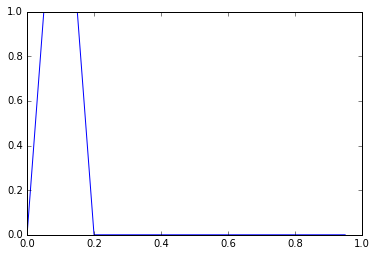

In [19]:
window = 100
t = range(window)
i = 5
#plt.plot(t, infectionsize[i][t], 'k-',t, infected_neighbours[i][t]/N, 'r-', t, infection_c_size[i][t], 'b-')

#plt.semilogy(t, 1-infectionsize[9][t], 'b*')
#plt.plot(t, coalitionsize[1][t]) 
#plt.plot(coalitionsize[i], neighboursize[i], 'b+')
plt.ylim(0, 1)
reverse = infectionsize.T
plt.plot(np.arange(steps)/steps, reverse[window-1][range(steps)])
plt.show()

In [ ]:
infectionsize[i][range(10)]

In [ ]:
infection_c_size[i][range(10)]

In [ ]:
n, bins, patches = plt.hist(coalitionsize[5], 20, normed=1, facecolor='green', alpha=0.75)
plt.show()

In [ ]:
np.random.choice(list({5,2}), 1, replace=False)[0]

In [ ]:
G = nx.random_partition_graph([10,10,10],.25,.01)
partition = G.graph['partition'][0]

In [ ]:
partition

In [ ]:
nx.draw(G)

In [ ]:
nx.draw(G[partition[0]])

In [ ]:
G[[0,1]]

In [ ]:
Htemp = nx.complete_graph(G)

In [ ]:
Htemp.edges[(0,2)]['freq']

In [ ]:
1 in G.neighbors(0)